<a href="https://colab.research.google.com/github/jhan-04/practice_learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#linear regression

In [2]:

import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from google.colab import files #파일 컴퓨터내에서 불러오기
myfile = files.upload()


Saving LinearRegressionData.csv to LinearRegressionData.csv


In [3]:
#io와 pandas 모듈 import
import io #이후 주피터 노트북과는 다르게 pandas 모듈 외 io 모듈을 import 합니다(io 모듈 없이 pandas 모듈만 import할 경우, 오류 발생).
import pandas as pd
#pd.read_csv로 csv파일 불러오기
dataset = pd.read_csv(io.BytesIO(myfile['LinearRegressionData.csv'])) #파일명 입력
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
x=dataset.iloc[:,:-1].values # 독립변수, 모든 row들고오기, 맨마지막 col빼고 들고오기
y=dataset.iloc[:,-1].values # 종속변수

In [5]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() #객체생성
reg.fit(x,y) #학습 모델 생성

LinearRegression()

In [6]:
y_pred=reg.predict(x)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

Text(0, 0.5, 'Score')

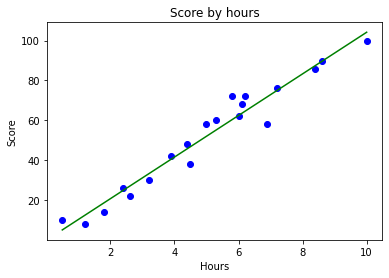

In [7]:
plt.scatter(x,y,color='b') #산점도
plt.plot(x,y_pred, color='g') #학습된 선
plt.title('Score by hours') 
plt.xlabel('Hours')
plt.ylabel('Score')

In [ ]:
print('9,8,7시간 공부 했을 때 예상 점수',reg.predict([[9],[8],[7]])) #입력형태를 맞춰서 넣어줘야 예상값 알 수 있다. 

9,8,7시간 공부 했을 때 예상 점수 [93.77478776 83.33109082 72.88739388]


In [ ]:
reg.coef_ #기울기 a, coeficient

array([10.44369694])

In [ ]:
reg.intercept_ #y 절편 b, y=a*x+b

#데이터 set분리

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
#pd.read_csv로 csv파일 불러오기
dataset = pd.read_csv(io.BytesIO(myfile['LinearRegressionData.csv'])) #파일명 입력
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [13]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0) #훈련 80%, 테스트 20% 랜덤하게 선택됨

In [16]:
x,len(x) #전체테이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]), 20)

In [17]:
x_train, len(x_train)#훈련테이터 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]), 16)

In [15]:
x_test, len(x_test)#테스트테이터 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]), 4)

In [19]:
# 분리된 데이러를 통한 모델링

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train) #훈련데이터 학습

LinearRegression()

Text(0, 0.5, 'Score')

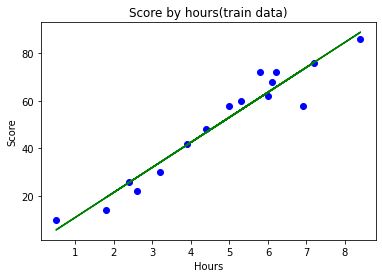

In [21]:
#train set 데이터 시각화
plt.scatter(x_train,y_train,color='b') #산점도
plt.plot(x_train,reg.predict(x_train), color='g') #학습된 선
plt.title('Score by hours(train data)') 
plt.xlabel('Hours')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

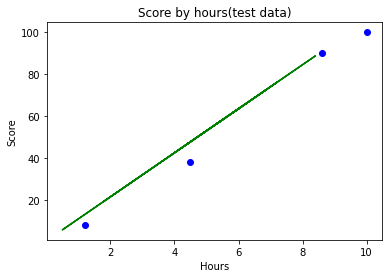

In [22]:
#test set 데이터 시각화
plt.scatter(x_test,y_test,color='b') # test 산점도
plt.plot(x_train,reg.predict(x_train), color='g') #train data로 학습된 선
plt.title('Score by hours(test data)') 
plt.xlabel('Hours')
plt.ylabel('Score')

In [23]:
reg.coef_ #기울기 a, coeficient

array([10.49161294])

In [24]:
reg.intercept_ #y 절편 b, y=a*x+b

0.6115562905169369

In [25]:
## 모델 평가
reg.score(x_test, y_test) #0부터 1사이의 값, 1에 갈수록 정확도 높은 것

0.9727616474310156

In [26]:
reg.score(x_train, y_train)

0.9356663661221668